## 01. PyTorch Workflow Fundamentals

Let's explore an example PyTorch end-to-end workflow.

In [85]:
what_were_covering = {1: 'data (prepare and load)',
                      2: 'build model',
                      3: 'fitting the model to data (training)',
                      4: 'making prediction and evaluating a model (inference)',
                      5: 'saving and loading a model',
                      6: 'putting it all together'}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making prediction and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [86]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.13.0+cu116'

## 1. Data (preparing and loading)

Data can be almost anything in ML.
* Excel spreadsheet
* Images
* Videos (YouTube)
* Audio (songs, podcasts)
* DNA
* Text

ML is a game of two parts:
1. Get data into numerical representation.
2. Build model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula. 

We'll use a linear regression formula to make a straight line with *known* **parameters**.

In [87]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]), 50, 50)

### Splitting data into training and test sets (one of most important ML concepts)

Let's create a training and test set with our data.

In [88]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

In [89]:
# """ Plots training data, test data, and compares predictions."""
# def plot_predictions(train_data=X_train, 
#                      train_labels=y_train,
#                      test_data=X_test,
#                      test_labels=y_test,
#                      predictions=None):
#   plt.figure(figsize=(10, 7))
  
#   # Plot training data in blue
#   plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")

#   # Plot test data in green
#   plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")

#   # Are there predictions?
#   if predictions is not None:
#     # Plot predictions if they exist
#     plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

#   # Show the legend
#   plt.legend(prop={'size': 14});

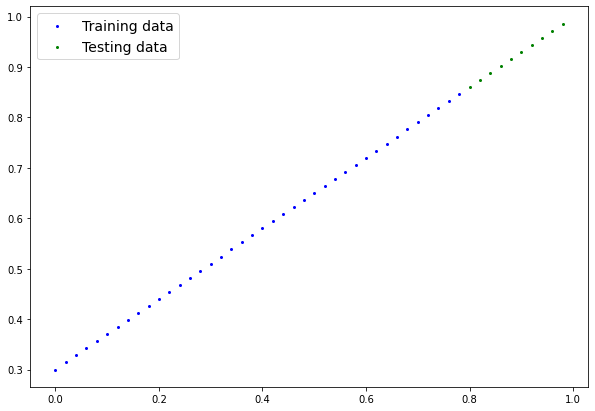

In [90]:
plot_predictions();

## 2. Build model

Our first PyTorch model! Get familiar w/ OOP in Python. Search `real python python classes`

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent the ideal values (weight & bias used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

In [91]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  # Forward method to define computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- 'x' is the input data
    return self.weights * x + self.bias # this is the linear regression formula
    

### PyTorch model building essentials

* `torch.nn` - contains all of the building blocks for computational graphs (neural networks)
* `torch.nn.Parameter` - what parameters our model should try and learn, often a PyTorch layer form torch.nn will set these for us
* `torch.nn.Module` - the base class for all neural network modules; if you subclass it, you should overwrite `forward()`
* `torch.optim` - this is where the optimizers in PyTorch live; they will help with gradient descent
* def forward() - all `nn.Module` subclasses require you to overwrite `forward()`, defines what happens in the forward computation

In [92]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

### Checking the contents of our PyTorch model

Now that we've created a model, let's see what's inside...

Use `.parameters()` to check our model parameters (what's inside model).

In [93]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [94]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `x_test`

When we pass data through our model, it's going to run it through the forward() method.

In [95]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]), tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [96]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [97]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

# Can also use torch.no_grad(), but torch.inference_mode() preferred
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [98]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

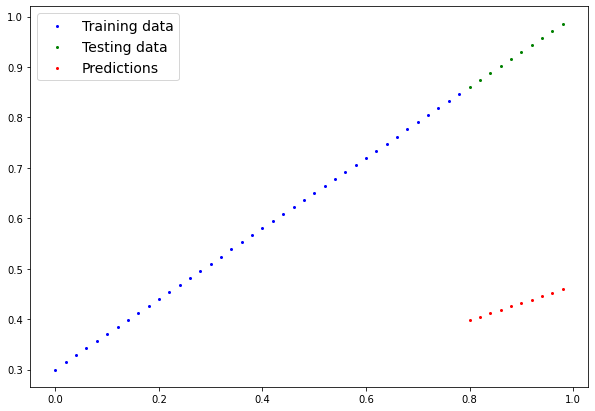

In [99]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (may be random) to some *known* parameters.bias

In other words, from a poor representation of the data to a better representation of the data.

One way to measure how poor/wrong the model's predictions are is to use a loss function.

* Note: loss function may also be called cost function or criterion in different areas; for our case, we're going to refer to it as a loss function.

Things we need to train:
* **Loss function:** a function to measure how wrong the model's predictions are compared to the ideal outputs (lower is better)
* **Optimizer:** takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias)

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [100]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [101]:
# Check out our model's parameters (parameter == value model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [102]:
# Set up a loss function
loss_fn = nn.L1Loss()

# Set up an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.01) # lr == learning rate, possibly most important hyperparameter

**Q:** Which loss function and optimizer should I use?

**A:** This will be problem specific. W/ experience, you'll get an idea of what works and what doesn't with your particular pset.

For ex., for a regression problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss).

### Building a training (and testing) loop in PyTorch

Couple of things we need:
0. Loop through data and do...
1. Forward pass (involves data moving through our model's `forward()` functions) - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backward through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use optimizer to adjust model's params to improve loss (**gradient descent**)

In [103]:
torch.manual_seed(42)

# An epoch is one loop through the data...
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop thru data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in Python sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss w.r.t. params of model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default, how the optimizer changes will accumulate thru the loop, so we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  model_0.eval() # turns off different settings in the model not needed for eval/testing (dropout/batch norm layers)

  with torch.inference_mode(): # turns off gradient tracking and a couple more things behind the scenes
    # 1. Do forward pass
    test_pred = model_0(X_test)

    # 2. Calc the loss
    test_loss = loss_fn(test_pred, y_test)
  
  # Print what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')
    # Print out model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [104]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy()), test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

Text(0.5, 0, 'Epochs')

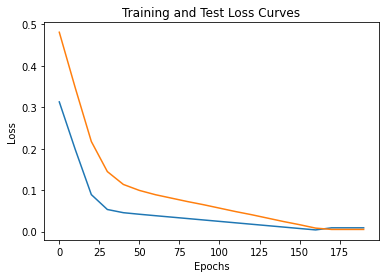

In [105]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label='Train loss')
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label='Test loss')
plt.title('Training and Test Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [106]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [107]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [108]:
weight, bias

(0.7, 0.3)

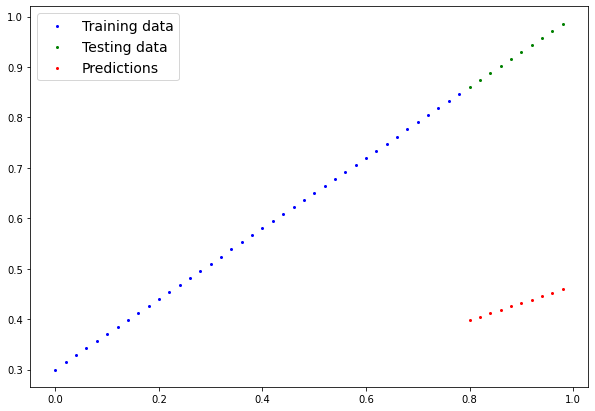

In [109]:
plot_predictions(predictions=y_preds);

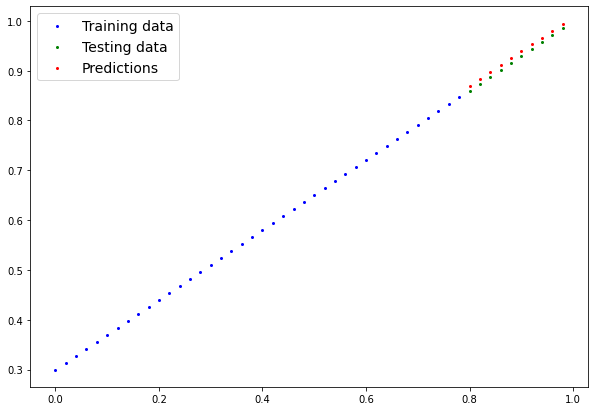

In [110]:
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch

There are three main methods for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows you to load a model's saved state dict

In [111]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save model state_dict()
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [112]:
!ls -l models

total 8
-rw-r--r-- 1 root root 1207 Jan 10 20:19 01_pytorch_workflow_model_0.pth
-rw-r--r-- 1 root root 1271 Jan 10 19:35 01_pytorch_workflow_model_1.pth


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather than the entire model, create a new instance of model class and `state_dict()` into that.

In [113]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [114]:
# Instantiate new instance of model class to load saved state_dict()
loaded_model_0 = LinearRegressionModel()

# Load saved state_dict of model_0 (update new instance w/ updated params)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [115]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [116]:
# Make predictions w/ loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [117]:
# Compare loaded model preds w/ og model preds
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [118]:
# ^Or do this
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [119]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all in one place.

In [120]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.13.0+cu116'

Create device-agnostic code.

If we have access to GPU, our code will use it (for potentially faster computing).

If no GPU available, the code will default to using CPU.

In [121]:
# Set up device-agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cuda


### 6.1 Data

In [122]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # w/o unsqueeze, errors
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [123]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

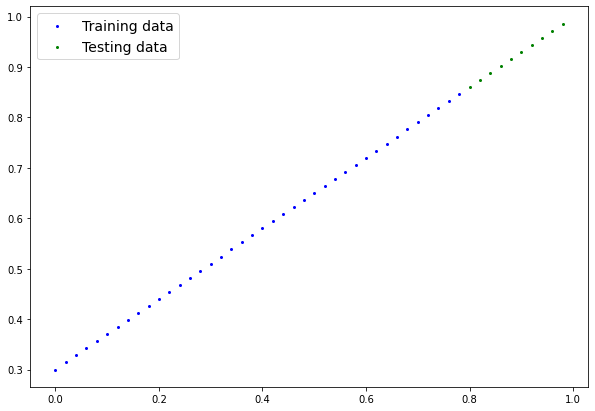

In [124]:
# Plot data
# Unless plot_predictions function loaded, this will error
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch linear model

In [125]:
# Create linear model by subclassing nn.Module
class LinRegModel(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model params
    # Also called: linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set manual seed
torch.manual_seed(42)
model_1 = LinRegModel()
model_1, model_1.state_dict()

(LinRegModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [126]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [127]:
# Check model curr device
next(model_1.parameters()).device

device(type='cpu')

In [128]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [129]:
# Set up loss function
loss_fn = nn.L1Loss() # same as MAE

# Set up our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [130]:
# Write training loop
torch.manual_seed(42)

epochs = 200

# Put data on target device (device agnostic code)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calc loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backprop
  loss.backward()

  # 5. Optimizer step (update params)
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  # Print what's happening
  if epoch % 10 == 0:
    print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416

In [131]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [132]:
weight, bias

(0.7, 0.3)

### 6.4 Making and evaluating predictions

In [133]:
# Turn model into eval mode
model_1.eval()

# Make preds on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

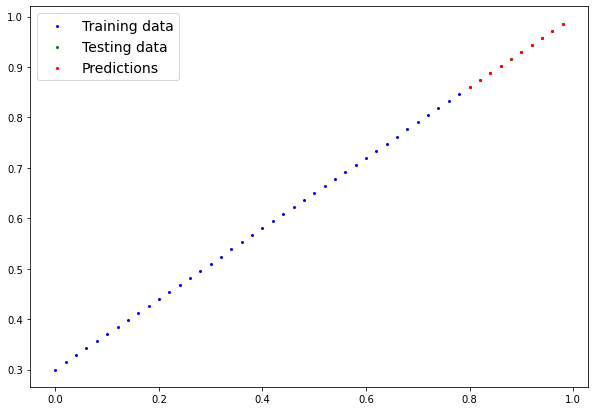

In [134]:
# Check preds visually
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving & loading trained model

In [135]:
from pathlib import Path

# Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = '01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save model state_dict()
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [136]:
!ls -l models

total 8
-rw-r--r-- 1 root root 1207 Jan 10 20:19 01_pytorch_workflow_model_0.pth
-rw-r--r-- 1 root root 1271 Jan 10 20:19 01_pytorch_workflow_model_1.pth


In [137]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [138]:
### Load a PyTorch model
# Create new instance of lin reg model
loaded_model_1 = LinRegModel()

# Load model state_dict()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put loaded model to device
loaded_model_1.to(device)

LinRegModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [139]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [140]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [141]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

## Exercises & Extra-curriculum

In [174]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Device-agnostice
device = 'cuda' if torch.cuda.is_available else 'cpu'

### 1. Create straight line dataset using lin reg formula

In [175]:
# Create data params
weight, bias = 0.3, 0.9

# Create dataset
start = 0
end = 20
step = 0.1

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.1000],
         [0.2000],
         [0.3000],
         [0.4000],
         [0.5000],
         [0.6000],
         [0.7000],
         [0.8000],
         [0.9000]]), tensor([[0.9000],
         [0.9300],
         [0.9600],
         [0.9900],
         [1.0200],
         [1.0500],
         [1.0800],
         [1.1100],
         [1.1400],
         [1.1700]]))

In [176]:
# Train/test spilt
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(160, 160, 40, 40)

In [177]:
""" Plots training data, test data, and compares predictions."""
def plot_predictions(train_data=X_train, 
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))
  
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot predictions if they exist
    plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={'size': 14});

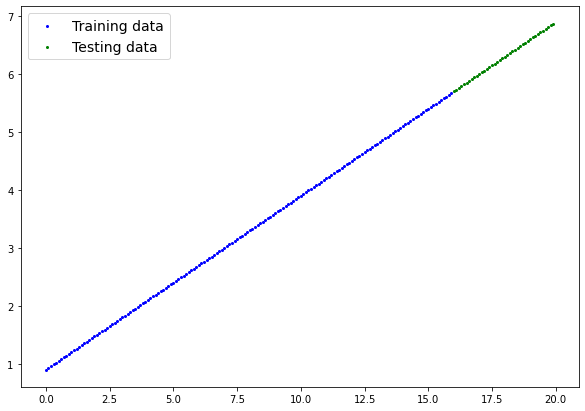

In [178]:
# Plot training and testing data
plot_predictions(X_train, y_train, X_test, y_test)

### 2. Build PyTorch model by subclassing `nn.Module`

In [179]:
# Create PyTorch linear regression model
class LinRegModel2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [180]:
# Instantiate model and put to device
torch.manual_seed(42)
model_2 = LinRegModel2()
model_2, model_2.state_dict()

(LinRegModel2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [181]:
next(model_2.parameters()).device

device(type='cpu')

In [182]:
model_2.to(device)
next(model_2.parameters()).device
list(model_2.parameters())

[Parameter containing:
 tensor([[0.7645]], device='cuda:0', requires_grad=True), Parameter containing:
 tensor([0.8300], device='cuda:0', requires_grad=True)]

### 3. Create loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively

In [183]:
# Create loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [184]:
# Training loop
torch.manual_seed(42)
epochs = 300

# Put data on target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  # Put model in train mode
  model_2.train()

  # Forward pass
  y_pred = model_2(X_train)

  # Calc loss
  loss = loss_fn(y_pred, y_train)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Perform backpropagation
  loss.backward()

  # Optimizer step (update params)
  optimizer.step()

  ### Testing every 20 epochs
  if epoch % 20 == 0:
    # Model in inference mode and setup inference context
    model_2.eval()
    with torch.inference_mode():
      # Forward pass
      test_pred = model_2(X_test)
      # Calculate the loss
      test_loss = loss_fn(test_pred, y_test)
      # Print what's happening
      print(f'Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}')


Epoch: 0 | Train loss: 3.624 | Test loss: 6.832
Epoch: 20 | Train loss: 0.115 | Test loss: 1.318
Epoch: 40 | Train loss: 0.096 | Test loss: 1.343
Epoch: 60 | Train loss: 0.187 | Test loss: 1.123
Epoch: 80 | Train loss: 0.126 | Test loss: 1.244
Epoch: 100 | Train loss: 0.086 | Test loss: 1.321
Epoch: 120 | Train loss: 0.059 | Test loss: 1.371
Epoch: 140 | Train loss: 0.039 | Test loss: 1.407
Epoch: 160 | Train loss: 0.025 | Test loss: 1.433
Epoch: 180 | Train loss: 0.122 | Test loss: 1.208
Epoch: 200 | Train loss: 0.111 | Test loss: 1.227
Epoch: 220 | Train loss: 0.103 | Test loss: 1.238
Epoch: 240 | Train loss: 0.097 | Test loss: 1.249
Epoch: 260 | Train loss: 0.093 | Test loss: 1.253
Epoch: 280 | Train loss: 0.090 | Test loss: 1.258


### 4. Make predictions with trained model on test data

In [185]:
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2912]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8834], device='cuda:0'))])

In [186]:
weight, bias

(0.3, 0.9)

In [187]:
# Make preditions
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test)
y_preds

tensor([[5.5420],
        [5.5711],
        [5.6002],
        [5.6293],
        [5.6584],
        [5.6876],
        [5.7167],
        [5.7458],
        [5.7749],
        [5.8040],
        [5.8331],
        [5.8622],
        [5.8914],
        [5.9205],
        [5.9496],
        [5.9787],
        [6.0078],
        [6.0369],
        [6.0661],
        [6.0952],
        [6.1243],
        [6.1534],
        [6.1825],
        [6.2116],
        [6.2408],
        [6.2699],
        [6.2990],
        [6.3281],
        [6.3572],
        [6.3863],
        [6.4155],
        [6.4446],
        [6.4737],
        [6.5028],
        [6.5319],
        [6.5610],
        [6.5902],
        [6.6193],
        [6.6484],
        [6.6775]], device='cuda:0')

In [188]:
len(y_preds), len(X_test)

(40, 40)

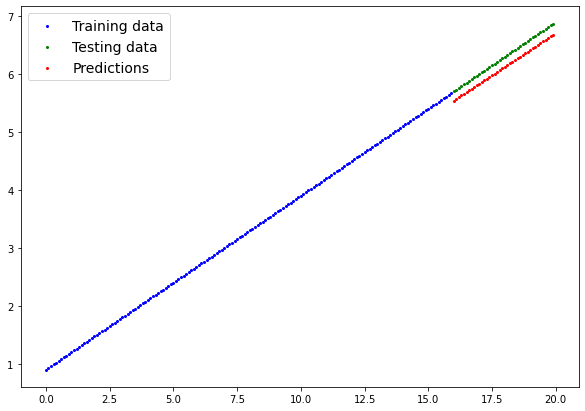

In [189]:
# Plot the predictions
plot_predictions(predictions=y_preds.cpu())

### Save trained model's `state_dict()` to file

In [190]:
from pathlib import Path

# Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)
# Create model save path
MODEL_NAME = '01_pytorch_model'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# Save model state dict
print(f'Saving model to {MODEL_SAVE_PATH}')
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

Saving model to models/01_pytorch_model


In [191]:
# Create new instance of model and load saved state dict
loaded_model = LinRegModel2()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model.to(device)

LinRegModel2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [192]:
y_preds_new = loaded_model(X_test)
y_preds == y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

In [193]:
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2912]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8834], device='cuda:0'))])